<h1 style="text-align: center;">Predicting Customer Responses to Marketing Offers</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import tensorflow as tf

### Read in data

In [5]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Exploratory Data Analysis

In [9]:
data.shape

(2240, 29)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [15]:
#Converted Dt_Customer to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst = True)

In [17]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [578]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [579]:
#Filled null values in Income with median value
imputer = SimpleImputer(strategy = 'median')
data['Income'] = imputer.fit_transform(data[['Income']])
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [580]:
#Dropping unimportant variables
data = data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)

In [581]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Data Preparation and Preprocessing

In [583]:
#Created a new variable Customer_Month from Dt_Customer
data['Customer_Month'] = data['Dt_Customer'].dt.month
data = data.drop('Dt_Customer',axis=1)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Month
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,9
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,3
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,8
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,2
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,4,5,0,0,0,0,0,0,0,6
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,5,7,0,0,0,1,0,0,0,6
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,13,6,0,1,0,0,0,0,0,1
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,10,3,0,0,0,0,0,0,0,1


In [584]:
#Created a new variable Children from Kidhome+Teenhome
data['Children'] = data['Kidhome'] + data['Teenhome']
data = data.drop(['Kidhome','Teenhome'],axis=1)
data

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Month,Children
0,1957,Graduation,Single,58138.0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,1,9,0
1,1954,Graduation,Single,46344.0,38,11,1,6,2,1,...,5,0,0,0,0,0,0,0,3,2
2,1965,Graduation,Together,71613.0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,0,8,0
3,1984,Graduation,Together,26646.0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,0,2,1
4,1981,PhD,Married,58293.0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,46,709,43,182,42,118,...,5,0,0,0,0,0,0,0,6,1
2236,1946,PhD,Together,64014.0,56,406,0,30,0,0,...,7,0,0,0,1,0,0,0,6,3
2237,1981,Graduation,Divorced,56981.0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,0,1,0
2238,1956,Master,Together,69245.0,8,428,30,214,80,30,...,3,0,0,0,0,0,0,0,1,1


In [585]:
#Created a new variable Age from Year_Birth
data['Age'] = 2025 - data['Year_Birth']
data = data.drop('Year_Birth',axis=1)
data

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Month,Children,Age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,9,0,68
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,3,2,71
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,8,0,60
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,2,1,41
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,709,43,182,42,118,247,...,0,0,0,0,0,0,0,6,1,58
2236,PhD,Together,64014.0,56,406,0,30,0,0,8,...,0,0,0,1,0,0,0,6,3,79
2237,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,...,0,1,0,0,0,0,0,1,0,44
2238,Master,Together,69245.0,8,428,30,214,80,30,61,...,0,0,0,0,0,0,0,1,1,69


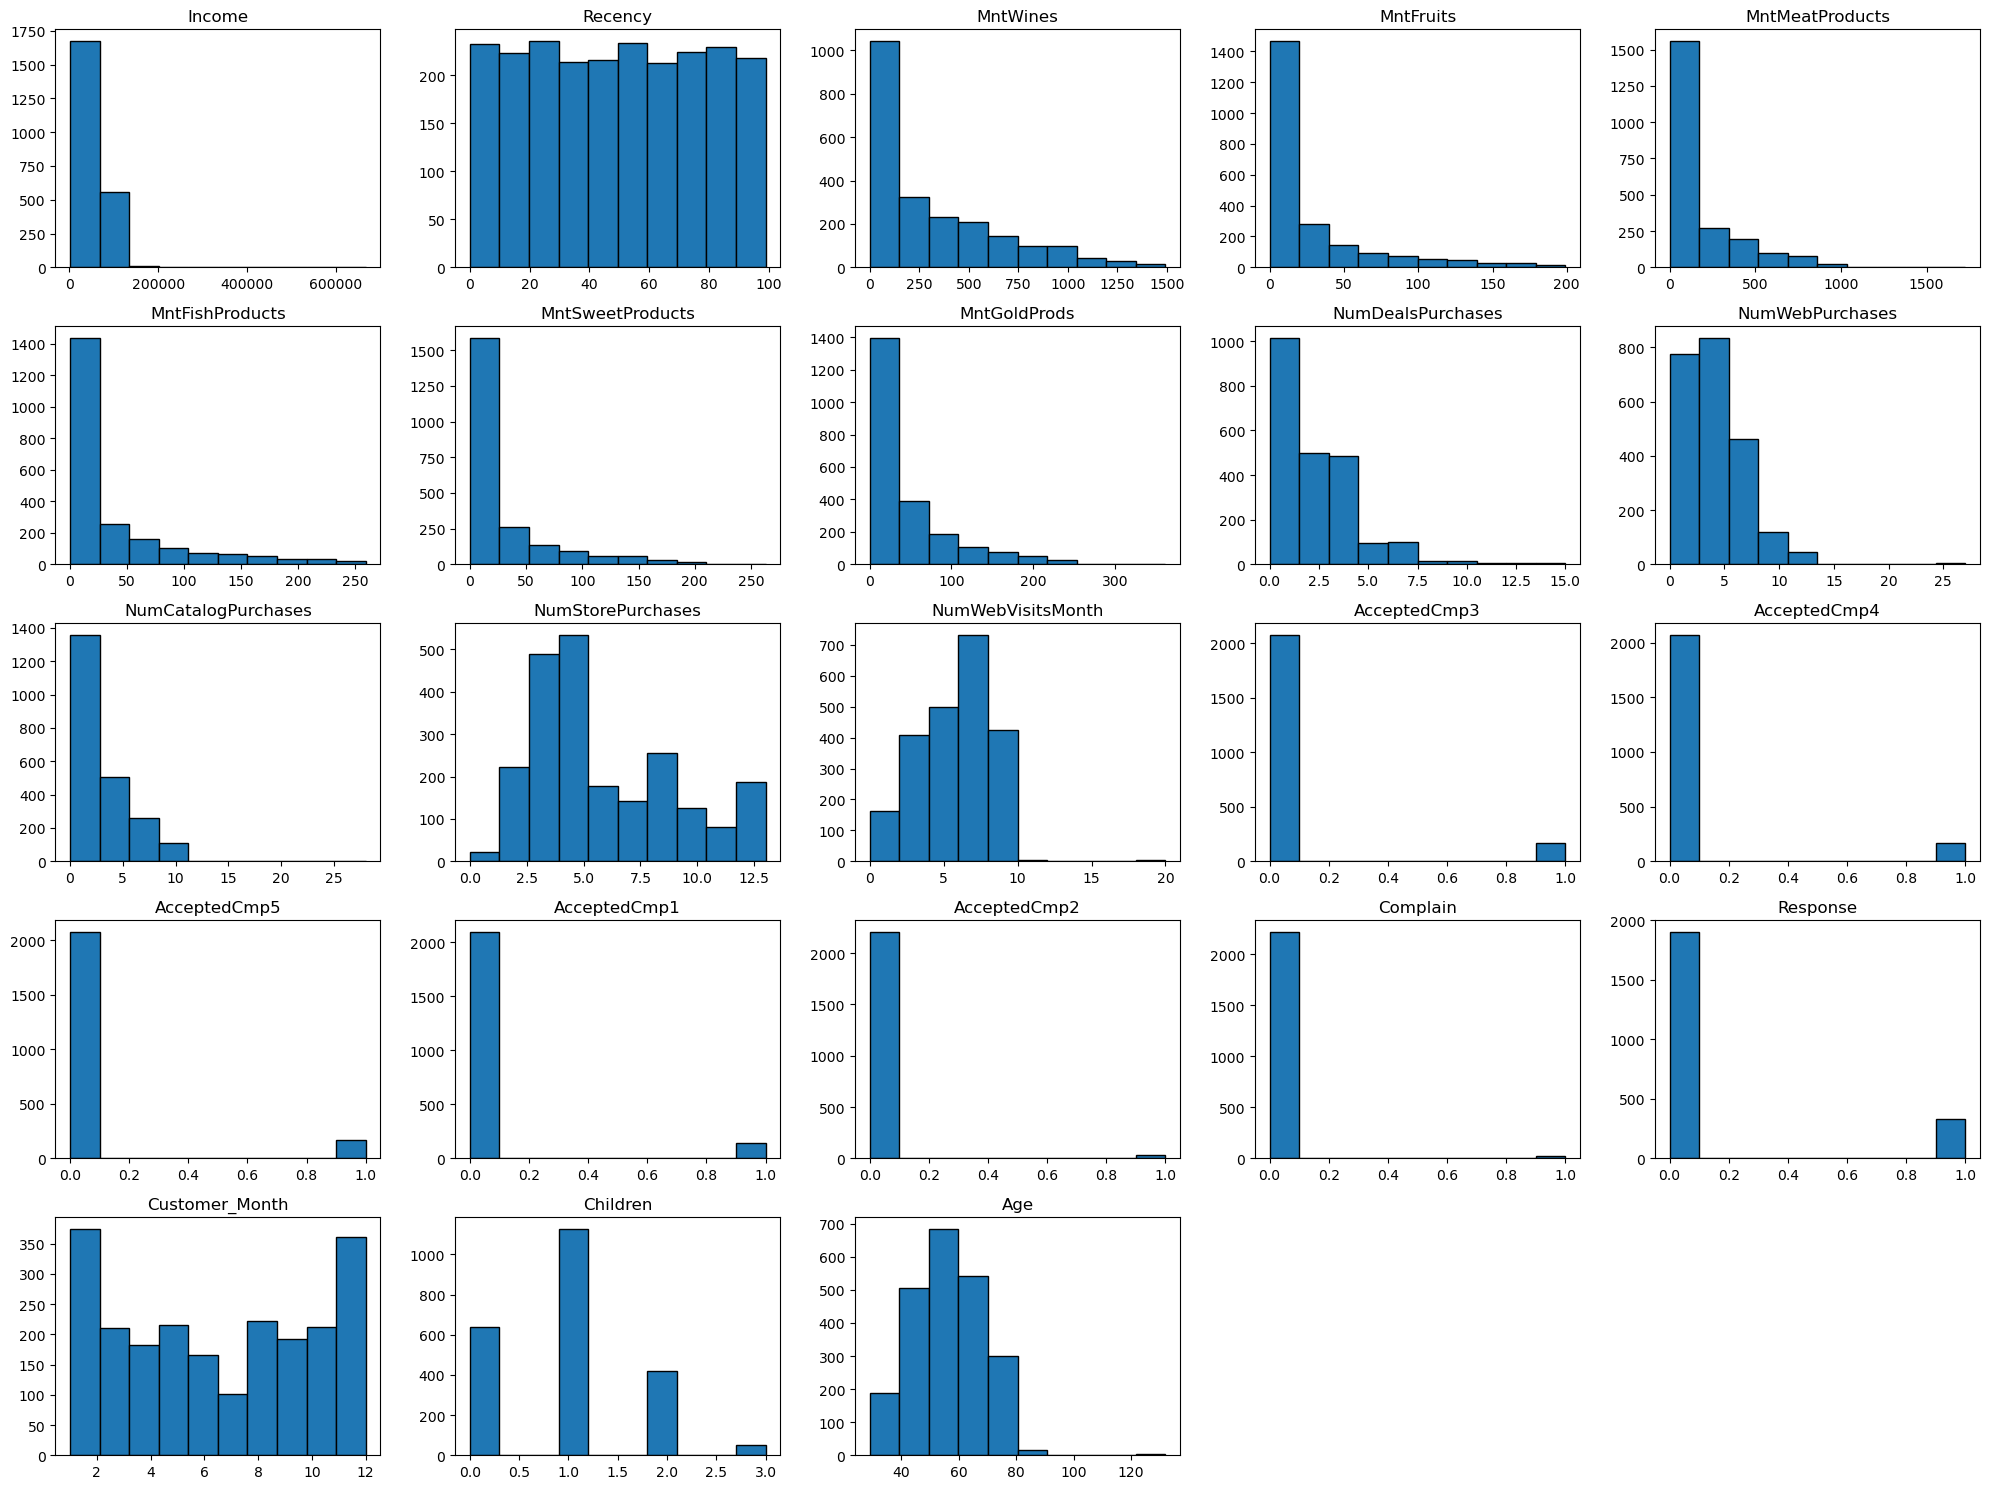

In [586]:
numeric_col = data.select_dtypes('number').columns
data[numeric_col].hist(bins=10, figsize=(20, 15), edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

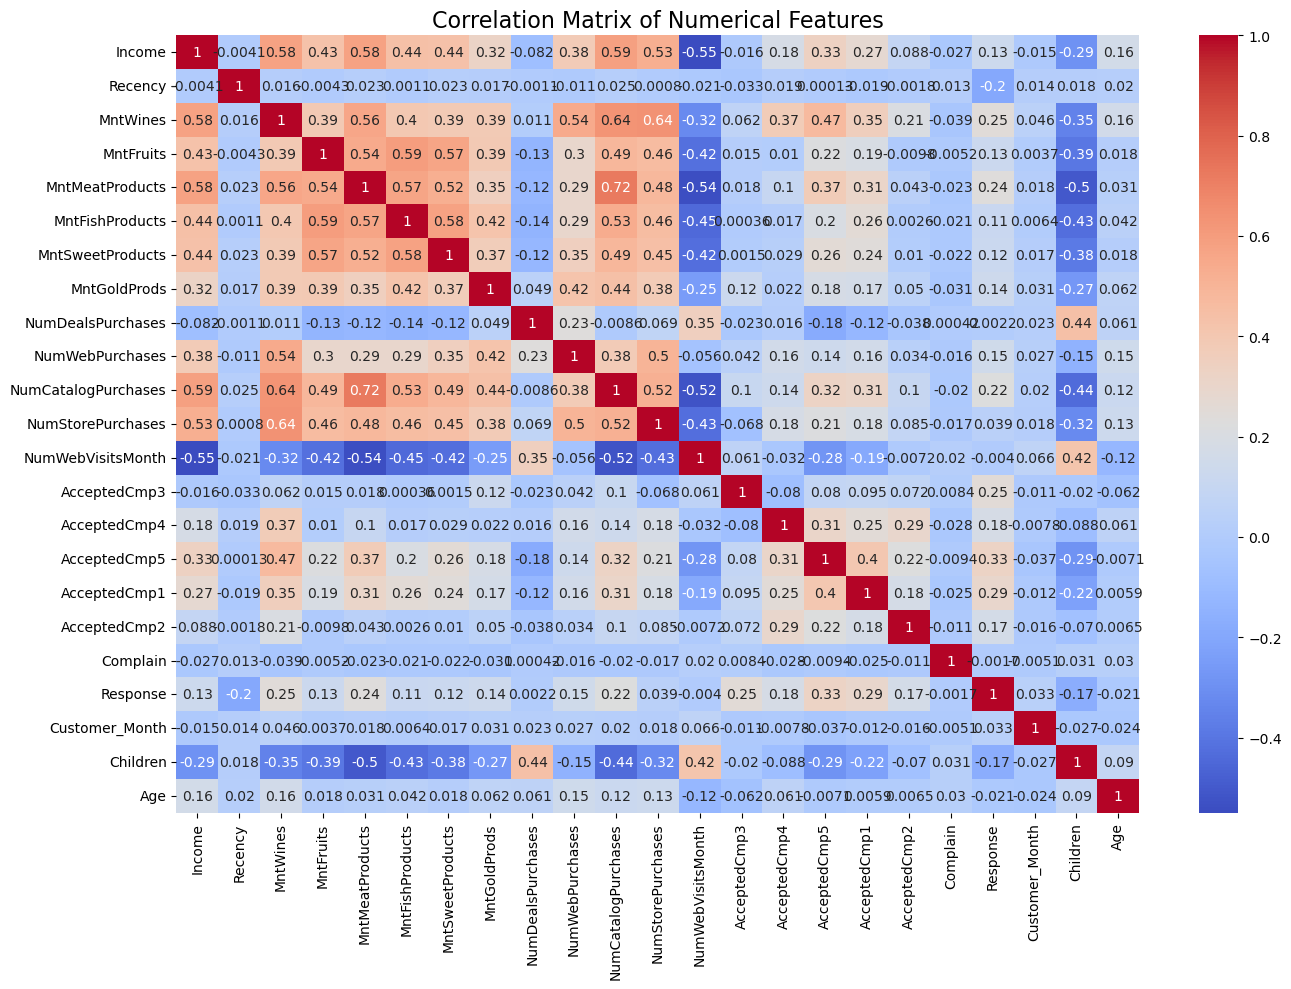

In [587]:
plt.figure(figsize=(14, 10))
sns.heatmap(data[numeric_col].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

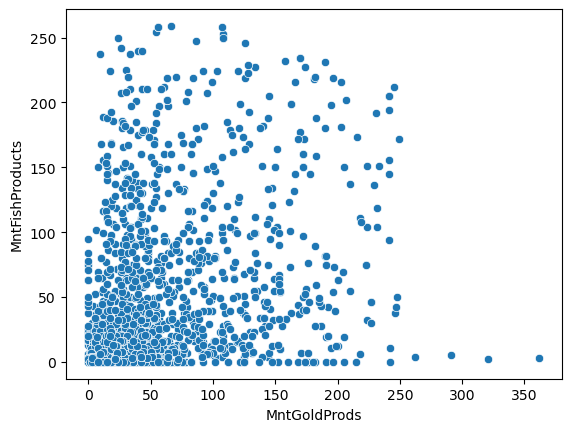

In [588]:
sns.scatterplot(x=data['MntGoldProds'],y=data['MntFishProducts'],data=data)
plt.show()

##### Split data into X and y

In [590]:
X = data.drop('Response',axis=1)
y = data['Response']

In [591]:
X_train,X_test_full,y_train,y_test_full = train_test_split(X,y,test_size=0.20,random_state=42)
X_valid,X_test,y_valid,y_test = train_test_split(X_test_full,y_test_full,test_size=0.50,random_state=42)

In [592]:
print(y_train.value_counts(normalize=True))

Response
0    0.852121
1    0.147879
Name: proportion, dtype: float64


In [661]:
numeric_cols = [col for col in X_train.select_dtypes('number').columns if col not in ['Age','Complain']]
categoric_cols = ['Education','Marital_Status']
passthrough_cols = ['Age','Complain']
log_transformer = FunctionTransformer(np.log1p)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),('log_transform', log_transformer),('standardize', StandardScaler())])
cat_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first'))])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categoric_cols),
    ('untransformed','passthrough',passthrough_cols)
])

### Model Training

#### Logistic Regression 

In [596]:
pipeline_log = Pipeline([('prep',preprocessing),('log',LogisticRegression())])

In [597]:
params = {'log__C':np.logspace(0,3,10)}
log_cv = GridSearchCV(estimator=pipeline_log, param_grid=params,scoring='f1_macro',cv=5,n_jobs=-1,verbose=True,return_train_score=True)
log_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Income',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurchases',
                                                                          'NumWebPurchases',
                                                                          'NumCatalogP...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Education',
                                                                          'Marital_Status']),
                                                                        ('untransformed',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Complain'])])),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])},
             return_train_score=True, scoring='f1_macro', verbose=True)

In [598]:
print(f'Best Score: {log_cv.best_score_}')
print(f'Best Parameters: {log_cv.best_params_}')

Best Score: 0.7474977023807179
Best Parameters: {'log__C': 46.41588833612777}


In [599]:
y_test_pred_log = log_cv.best_estimator_.predict(X_test)

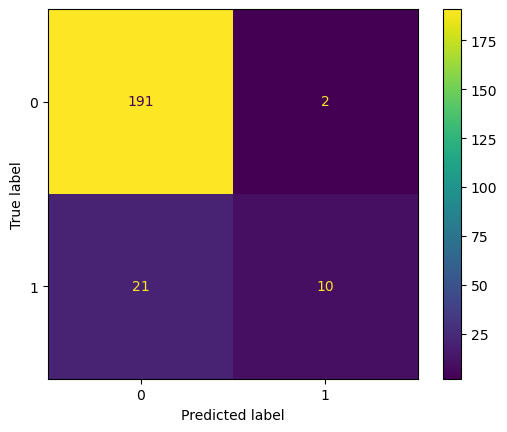

In [600]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_log)
plt.show()

In [601]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred_log)}')
print(f'Precision: {precision_score(y_test,y_test_pred_log)}')
print(f'Recall: {recall_score(y_test,y_test_pred_log)}')
print(f'F1 Score: {f1_score(y_test,y_test_pred_log)}')

Accuracy: 0.8973214285714286
Precision: 0.8333333333333334
Recall: 0.3225806451612903
F1 Score: 0.46511627906976744


In [602]:
log_results = pd.DataFrame(log_cv.cv_results_)
log_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013151,0.002449,0.002806,0.000819,1.000000,{'log__C': 1.0},0.740981,0.762217,0.718553,0.733120,...,0.741086,0.014882,3,0.756075,0.743046,0.748959,0.767889,0.751235,0.753441,0.008351
1,0.018187,0.000723,0.002788,0.000658,2.154435,{'log__C': 2.154434690031884},0.728030,0.766472,0.718553,0.724137,...,0.737550,0.018095,9,0.748935,0.737706,0.756605,0.767889,0.755751,0.753377,0.009919
2,0.016603,0.001882,0.002813,0.001497,4.641589,{'log__C': 4.641588833612778},0.731880,0.766472,0.706999,0.720412,...,0.738617,0.024399,6,0.754506,0.738706,0.752472,0.763482,0.749194,0.751672,0.008030
3,0.013792,0.003008,0.002206,0.000283,10.000000,{'log__C': 10.0},0.737072,0.762217,0.710779,0.729336,...,0.741301,0.020956,2,0.753475,0.745891,0.747940,0.772297,0.755565,0.755034,0.009324
4,0.019456,0.004813,0.002632,0.000923,21.544347,{'log__C': 21.544346900318832},0.729446,0.775427,0.703285,0.725613,...,0.738559,0.025585,7,0.748156,0.746383,0.757123,0.773419,0.749194,0.754855,0.009985
5,0.018969,0.004673,0.003878,0.001467,46.415888,{'log__C': 46.41588833612777},0.737072,0.775427,0.728551,0.729336,...,0.747498,0.019809,1,0.753475,0.746383,0.751235,0.766925,0.753499,0.754303,0.006823
6,0.019599,0.005365,0.003599,0.001078,100.000000,{'log__C': 100.0},0.733227,0.766472,0.714630,0.729336,...,0.740615,0.019384,5,0.749396,0.747916,0.751235,0.762437,0.754330,0.753063,0.005153
7,0.020511,0.007651,0.003480,0.001350,215.443469,{'log__C': 215.44346900318823},0.725726,0.762217,0.700710,0.729336,...,0.741038,0.030256,4,0.748387,0.744347,0.752262,0.777644,0.754721,0.755472,0.011631
8,0.018807,0.003977,0.003447,0.001182,464.158883,{'log__C': 464.15888336127773},0.729446,0.766883,0.718553,0.720412,...,0.738075,0.019425,8,0.759894,0.751211,0.752262,0.770007,0.756785,0.758032,0.006756
9,0.013653,0.002350,0.002707,0.000553,1000.000000,{'log__C': 1000.0},0.733227,0.757323,0.714630,0.707703,...,0.735997,0.023183,10,0.753672,0.739024,0.755751,0.773354,0.755751,0.755510,0.010897


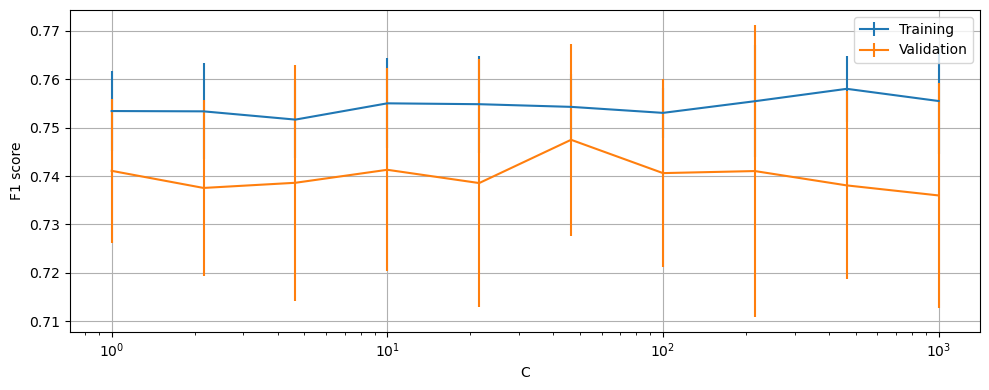

In [603]:
mean_train_scores = log_results['mean_train_score']
std_train_scores = log_results['std_train_score']
mean_test_scores = log_results['mean_test_score']
std_test_scores = log_results['std_test_score']
C_values = log_results['param_log__C']
plt.figure(figsize=(10, 4))
plt.errorbar(C_values,mean_train_scores,yerr=std_train_scores,label='Training')
plt.errorbar(C_values,mean_test_scores,yerr=std_test_scores,label='Validation')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1 score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Decision Tree

In [605]:
numeric_cols = [col for col in X_train.select_dtypes('number').columns if col not in ['Age','Complain']]
categoric_cols = ['Education','Marital_Status']
passthrough_cols = ['Age','Complain']

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median'))])
cat_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first'))])

preprocess = ColumnTransformer([
    ('num',num_pipeline,numeric_cols),
    ('cat',cat_pipeline,categoric_cols),
    ('untransformed','passthrough',passthrough_cols)
])

In [606]:
pipeline_tree = Pipeline([('prep',preprocess),('tree',DecisionTreeClassifier())])

In [607]:
params = {'tree__max_depth' : np.arange(start=2,stop=22)}
tree_cv = GridSearchCV(estimator = pipeline_tree,param_grid=params,scoring='f1_macro',cv=5,n_jobs=-1,verbose=True,return_train_score=True)
tree_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Income',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurchases',
                                                                          'NumWebPurchases',
                                                                          'NumCatalogPurchases',
                                                                          'NumStorePurchases',
                                                                          'Nu...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Education',
                                                                          'Marital_Status']),
                                                                        ('untransformed',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Complain'])])),
                                       ('tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'tree__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
             return_train_score=True, scoring='f1_macro', verbose=True)

In [608]:
print(f'Best score : {tree_cv.best_score_}')
print(f'Best params : {tree_cv.best_params_}')

Best score : 0.7073774977050261
Best params : {'tree__max_depth': 4}


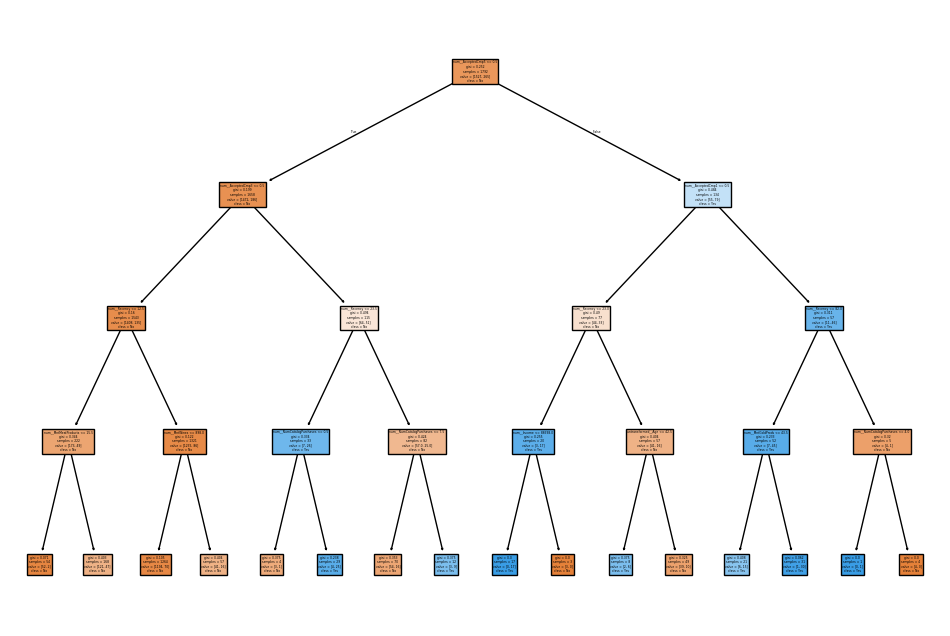

In [609]:
plt.figure(figsize=(12, 8))
_ = tree.plot_tree(tree_cv.best_estimator_.named_steps['tree'],
                   feature_names=tree_cv.best_estimator_.named_steps['prep'].get_feature_names_out(),
                   class_names=['No','Yes'],
                   filled=True)

plt.show()

In [610]:
y_test_pred_tree = tree_cv.best_estimator_.predict(X_test)

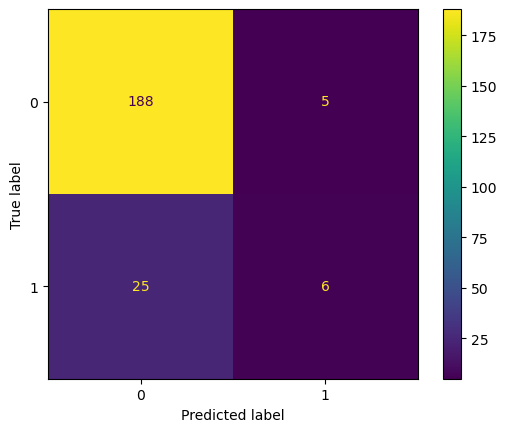

In [611]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_tree)
plt.show()

In [612]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred_tree)}')
print(f'Precision: {precision_score(y_test,y_test_pred_tree)}')
print(f'Recall: {recall_score(y_test,y_test_pred_tree)}')
print(f'F1 Score: {f1_score(y_test,y_test_pred_tree)}')

Accuracy: 0.8660714285714286
Precision: 0.5454545454545454
Recall: 0.1935483870967742
F1 Score: 0.2857142857142857


In [613]:
tree_results = pd.DataFrame(tree_cv.cv_results_)
tree_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010049,0.003326,0.002460,0.000646,2,{'tree__max_depth': 2},0.591106,0.637309,0.576206,0.623099,...,0.610046,0.022684,20,0.611620,0.653003,0.615107,0.603349,0.603903,0.617397,0.018362
1,0.010665,0.001251,0.002902,0.001134,3,{'tree__max_depth': 3},0.672146,0.696166,0.695120,0.668435,...,0.691699,0.020858,14,0.716402,0.708025,0.710635,0.704615,0.702393,0.708414,0.004891
2,0.010557,0.002607,0.003390,0.001598,4,{'tree__max_depth': 4},0.675826,0.702644,0.720313,0.672869,...,0.707377,0.033834,1,0.759023,0.727695,0.756815,0.764912,0.748886,0.751466,0.012948
3,0.012682,0.003942,0.004060,0.002361,5,{'tree__max_depth': 5},0.675826,0.724651,0.714630,0.649337,...,0.697799,0.030171,7,0.787773,0.768345,0.787773,0.805477,0.784271,0.786728,0.011813
4,0.013802,0.004471,0.005024,0.002268,6,{'tree__max_depth': 6},0.651532,0.748095,0.697007,0.663144,...,0.689915,0.033541,17,0.840268,0.817741,0.818511,0.821936,0.841907,0.828073,0.010733
5,0.013683,0.003884,0.002716,0.001085,7,{'tree__max_depth': 7},0.648315,0.713259,0.669620,0.663172,...,0.688985,0.037618,18,0.862630,0.853323,0.843967,0.872262,0.858673,0.858171,0.009423
6,0.015391,0.002511,0.003082,0.001327,8,{'tree__max_depth': 8},0.656535,0.748095,0.699636,0.647802,...,0.691245,0.036225,15,0.890660,0.884482,0.873704,0.904699,0.890096,0.888728,0.010044
7,0.016720,0.001484,0.004180,0.002497,9,{'tree__max_depth': 9},0.663276,0.759811,0.669620,0.683007,...,0.701481,0.037766,4,0.906423,0.917719,0.890149,0.930539,0.910311,0.911028,0.013290
8,0.016690,0.003776,0.002954,0.001287,10,{'tree__max_depth': 10},0.660301,0.721165,0.713141,0.675859,...,0.699478,0.026469,5,0.934918,0.937402,0.915062,0.948178,0.922124,0.931537,0.011686
9,0.017540,0.004973,0.002900,0.001634,11,{'tree__max_depth': 11},0.663391,0.726699,0.678380,0.670766,...,0.694380,0.029271,9,0.941999,0.943116,0.945914,0.957608,0.924839,0.942695,0.010510


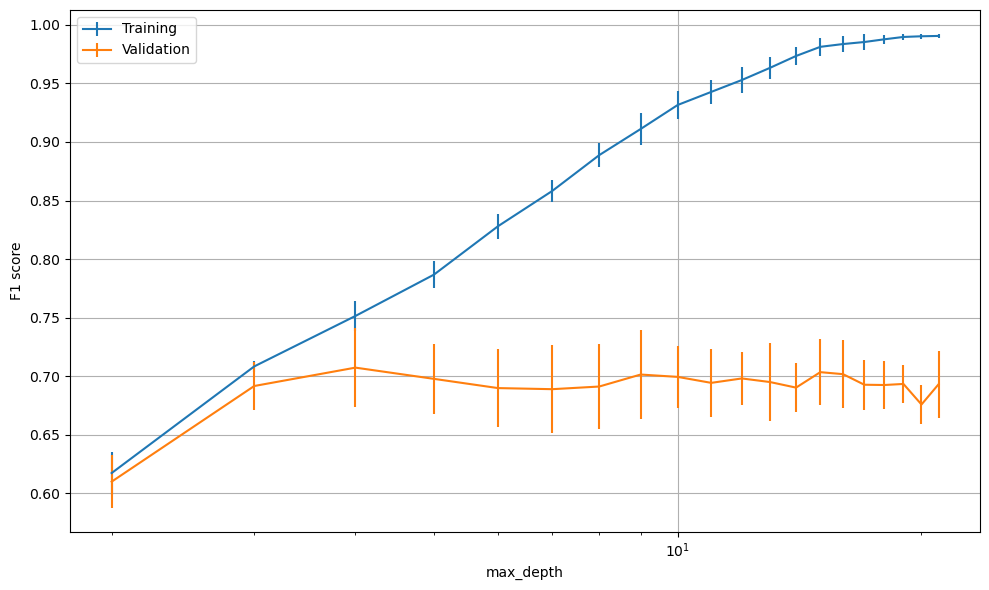

In [614]:
mean_train_score = tree_results['mean_train_score']
std_train_score = tree_results['std_train_score']
mean_test_score = tree_results['mean_test_score']
std_test_score = tree_results['std_test_score']
max_depth = tree_results['param_tree__max_depth']
plt.figure(figsize=(10,6))
plt.errorbar(max_depth,mean_train_score,yerr=std_train_score,label='Training')
plt.errorbar(max_depth,mean_test_score,yerr=std_test_score,label='Validation')
plt.xscale('log')
plt.xlabel('max_depth')
plt.ylabel('F1 score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Random Forest Classifier

In [655]:
pipeline_rnf = Pipeline([('prep',preprocess),('rnf',RandomForestClassifier())])

In [657]:
params = {'rnf__max_depth' : np.arange(start=2,stop=22), 'rnf__n_estimators' : [50,100,20]}
rnf_cv = GridSearchCV(estimator=pipeline_rnf,param_grid=params,scoring='f1_macro',cv=5,n_jobs=-1,verbose=True,return_train_score=True)
rnf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Income',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurchases',
                                                                          'NumWebPurchases',
                                                                          'NumCatalogPurchases',
                                                                          'NumStorePurchases',
                                                                          'Nu...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Education',
                                                                          'Marital_Status']),
                                                                        ('untransformed',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Complain'])])),
                                       ('rnf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rnf__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21]),
                         'rnf__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='f1_macro', verbose=True)

In [658]:
print(f'Best score : {rnf_cv.best_score_}')
print(f'Best params : {rnf_cv.best_params_}')

Best score : 0.6991313997919927
Best params : {'rnf__max_depth': 16, 'rnf__n_estimators': 100}


In [463]:
y_test_pred_rnf = rnf_cv.best_estimator_.predict(X_test)

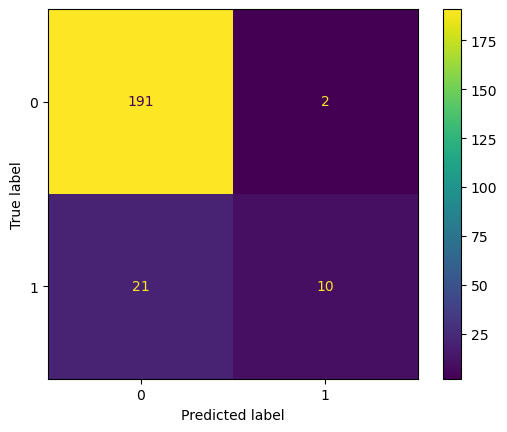

In [464]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rnf)
plt.show()

In [465]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred_rnf)}')
print(f'Precision: {precision_score(y_test,y_test_pred_rnf)}')
print(f'Recall: {recall_score(y_test,y_test_pred_rnf)}')
print(f'F1 Score: {f1_score(y_test,y_test_pred_rnf)}')

Accuracy: 0.8973214285714286
Precision: 0.8333333333333334
Recall: 0.3225806451612903
F1 Score: 0.46511627906976744


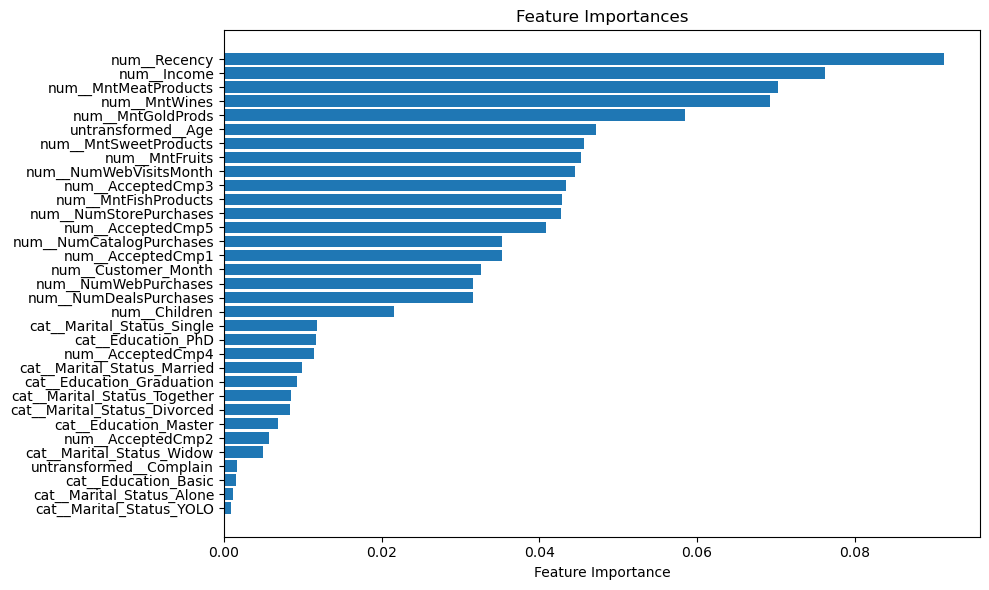

In [466]:
feature_names = rnf_cv.best_estimator_.named_steps['prep'].get_feature_names_out()
feature_importance = rnf_cv.best_estimator_.named_steps['rnf'].feature_importances_
df = pd.DataFrame({'Feature':feature_names, 'Feature Importance':feature_importance}).sort_values(by='Feature Importance')
plt.figure(figsize=(10,6))
plt.barh(df['Feature'],df['Feature Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### Gradient Boosting Classifier

In [468]:
pipeline_gb = Pipeline([('prep',preprocess),('gbc',GradientBoostingClassifier(max_depth=2,learning_rate=0.05,n_estimators=500,n_iter_no_change=10,random_state=42))])
pipeline_gb.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Income', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'AcceptedCm...
                                                   'AcceptedCmp2',
                                                   'Customer_Month',
                                                   'Children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Education',
                                                   'Marital_Status']),
                                                 ('untransformed',
                                                  'passthrough',
                                                  ['Age', 'Complain'])])),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=2,
                                            n_estimators=500,
                                            n_iter_no_change=10,
                                            random_state=42))])

In [469]:
y_test_pred_gb = pipeline_gb.predict(X_test)

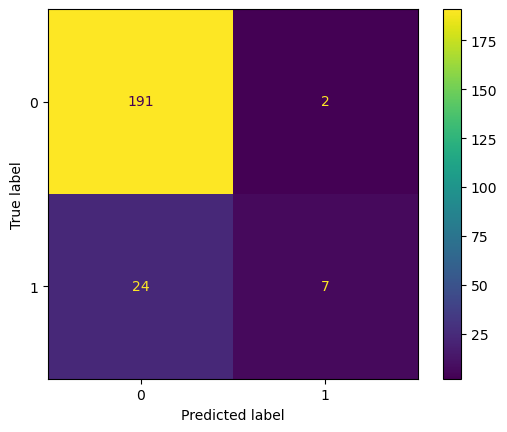

In [470]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gb)
plt.show()

In [471]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred_gb)}')
print(f'Precision: {precision_score(y_test,y_test_pred_gb)}')
print(f'Recall: {recall_score(y_test,y_test_pred_gb)}')
print(f'F1 Score: {f1_score(y_test,y_test_pred_gb)}')

Accuracy: 0.8839285714285714
Precision: 0.7777777777777778
Recall: 0.22580645161290322
F1 Score: 0.35


#### Support Vector Classifiers

In [473]:
pipeline_svc = Pipeline([('prep',preprocessing),('svc',SVC())])

In [474]:
params = {'svc__C' : np.logspace(-2,2,5), 'svc__gamma' : np.linspace(0.001,1,5), 'svc__kernel' : ['rbf']}
svc_cv = GridSearchCV(estimator = pipeline_svc,param_grid=params, scoring = 'f1_macro', n_jobs=-1 , verbose=True, return_train_score=True)
svc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Income',
                                                                          'Recency',
                                                                          'MntWines',
                                                                          'MntFruits',
                                                                          'MntMeatProducts',
                                                                          'MntFishProducts',
                                                                          'MntSweetProducts',
                                                                          'MntGoldProds',
                                                                          'NumDealsPurchases',
                                                                          'NumWebPurchases',
                                                                          'NumCatalogPurcha...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Education',
                                                                          'Marital_Status']),
                                                                        ('untransformed',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Complain'])])),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='f1_macro', verbose=True)

In [475]:
print(f'Best score : {svc_cv.best_score_}')
print(f'Best params : {svc_cv.best_params_}')

Best score : 0.724492440150027
Best params : {'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [476]:
y_test_pred_svc = svc_cv.best_estimator_.predict(X_test)

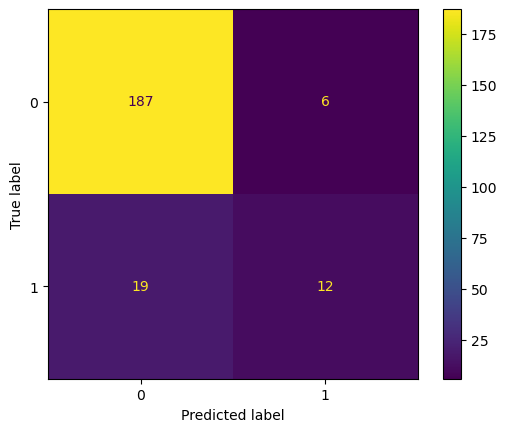

In [477]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svc)
plt.show()

In [478]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred_svc)}')
print(f'Precision: {precision_score(y_test,y_test_pred_svc)}')
print(f'Recall: {recall_score(y_test,y_test_pred_svc)}')
print(f'F1 Score: {f1_score(y_test,y_test_pred_svc)}')

Accuracy: 0.8883928571428571
Precision: 0.6666666666666666
Recall: 0.3870967741935484
F1 Score: 0.4897959183673469


#### Neural Networks

In [536]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_valid_transformed = preprocessing.transform(X_valid)
X_test_transformed = preprocessing.transform(X_test)

In [538]:
def architecture(scenario,input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = (input_shape,)))
    if scenario == 'scenario_1':
        model.add(tf.keras.layers.Dense(10,activation='tanh'))

    elif scenario == 'scenario_2':
        model.add(tf.keras.layers.Dense(10,activation='relu'))
        model.add(tf.keras.layers.Dropout(0.3))

    elif scenario == 'scenario_3':
        model.add(tf.keras.layers.Dense(10,activation='relu'))
        model.add(tf.keras.layers.Dense(10,activation='relu'))

    elif scenario == 'scenario_4':
        model.add(tf.keras.layers.Dense(20,activation='relu'))
        model.add(tf.keras.layers.Dense(20,activation='relu'))
        model.add(tf.keras.layers.Dense(20,activation='relu'))
        model.add(tf.keras.layers.Dense(20,activation='relu'))

    elif scenario == 'scenario_5':
        model.add(tf.keras.layers.Dense(30,activation='relu'))
        model.add(tf.keras.layers.Dense(20,activation='relu'))
        model.add(tf.keras.layers.Dense(10,activation='relu'))

    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

    model.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)
    return model

In [540]:
results = {}
histories = {}
scenarios = [f"scenario_{i}" for i in range(1,6)]
for scenario in scenarios:
    model = architecture(scenario,X_train_transformed.shape[1])
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights = True)
    history = model.fit(X_train_transformed,y_train, epochs = 100, validation_data = (X_valid_transformed,y_valid),callbacks=[early_stopping_cb])
    histories[scenario] = history.history
    test_loss,test_accuracy = model.evaluate(X_test_transformed,y_test)
    results[scenario] = {'Test Loss': test_loss,'Test Accuracy': test_accuracy}

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2502 - loss: 0.9626 - val_accuracy: 0.7232 - val_loss: 0.5974
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8195 - loss: 0.5446 - val_accuracy: 0.8304 - val_loss: 0.4974
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8647 - loss: 0.4516 - val_accuracy: 0.8348 - val_loss: 0.4640
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8578 - loss: 0.4254 - val_accuracy: 0.8304 - val_loss: 0.4516
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8492 - loss: 0.4210 - val_accuracy: 0.8304 - val_loss: 0.4458
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8500 - loss: 0.4118 - val_accuracy: 0.8304 - val_loss: 0.4407
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8595 - loss: 0.3916 - val_accuracy: 0.8304 - val_loss: 0.4349
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8519 - loss: 0.3953 - val_accura

In [541]:
df = pd.DataFrame(results).T.reset_index()
df.columns = ['Scenario','Test Loss','Test Accuracy']
df

,Scenario,Test Loss,Test Accuracy
0,scenario_1,0.298061,0.879464
1,scenario_2,0.293898,0.892857
2,scenario_3,0.311498,0.879464
3,scenario_4,0.295416,0.883929
4,scenario_5,0.281233,0.875000


In [544]:
best_model = architecture('scenario_2', X_train_transformed.shape[1])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
best_model.fit(X_train_transformed,y_train,epochs=100,validation_data=(X_valid_transformed, y_valid),callbacks=[early_stopping_cb])

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1905 - loss: 5.7003 - val_accuracy: 0.1696 - val_loss: 3.0421
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.2489 - loss: 2.5781 - val_accuracy: 0.2054 - val_loss: 0.9558
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.5391 - loss: 0.9739 - val_accuracy: 0.8214 - val_loss: 0.4994
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.6920 - loss: 0.7029 - val_accuracy: 0.8304 - val_loss: 0.4606
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - loss: 0.6556 - val_accuracy: 0.8304 - val_loss: 0.4502
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.6896 - loss: 0.6095 - val_accuracy: 0.8304 - val_loss: 0.4440
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7131 - loss: 0.5497 - val_accuracy: 0.8304 - val_loss: 0.4425
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6957 - loss: 0.5303 - val_accuracy

In [554]:
y_pred = best_model.predict(X_test_transformed)
y_pred = (y_pred > 0.5).astype(int).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [556]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'F1 Score: {f1_score(y_test,y_pred)}')

Accuracy: 0.8883928571428571
Precision: 0.875
Recall: 0.22580645161290322
F1 Score: 0.358974358974359
